In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings(action='ignore')
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.formula.api as formula
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels as sm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
#from sklearn.externals import joblib
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from IPython.display import display
from sklearn import metrics

In [2]:
data = pd.read_excel (r'D:\Downloads\rk_month.xlsx')
data['From Date']=pd.to_datetime(data['From Date'])
data['year'] = data['From Date'].dt.year
data['month'] = data['From Date'].dt.month
data['day'] = data['From Date'].dt.day

In [3]:
import datetime as dt

In [4]:
data['From Date']= data['From Date'].map(dt.datetime.toordinal)

In [5]:
df=data.loc['0':'365']

In [6]:
X1 = df[['From Date','year', 'month', 'day']]
Y1 = df['NO']

In [7]:
xtrain,xtest,ytrain,ytest = train_test_split(X1,Y1,test_size=.2,random_state=15)

In [8]:
grad_boost = GradientBoostingRegressor(n_estimators=100,
                                      max_depth=4,
                                      max_features='auto',
                                      min_samples_split=6,
                                      min_samples_leaf=6,
                                      learning_rate=0.1)

grad_boost.fit(xtrain,ytrain)

GradientBoostingRegressor(max_depth=4, max_features='auto', min_samples_leaf=6,
                          min_samples_split=6)

In [9]:
# we now score the model
print('Score on train data: {}\n'.format(grad_boost.score(xtrain,ytrain)))
print('Score on test data: {}\n'.format(grad_boost.score(xtest,ytest)))

gboost_pred = grad_boost.predict(xtest)
gboost_mse = mean_squared_error(ytest,gboost_pred)
gboost_accuracy = r2_score(ytest,gboost_pred)

print('Root Mean Squared Error: {}\n'.format(np.sqrt(gboost_mse)))
print('Overall model accuracy: {}'.format(gboost_accuracy))

Score on train data: 0.869898319308835

Score on test data: 0.6472062398606497

Root Mean Squared Error: 31.717190132534505

Overall model accuracy: 0.6472062398606497


In [10]:
test=data.loc['366':'418']
X=test[['From Date','year', 'month', 'day']]
X

,From Date,year,month,day
366,737436,2020,1,12
367,737443,2020,1,19
368,737450,2020,1,26
369,737457,2020,2,2
370,737464,2020,2,9
371,737471,2020,2,16
372,737478,2020,2,23
373,737485,2020,3,1
374,737492,2020,3,8
375,737499,2020,3,15


In [11]:
predict=grad_boost.predict(X)

In [12]:
predict

array([73.67809856, 53.09681629, 51.38006836, 64.70911229, 56.49335202,
       61.6703082 , 52.62700422, 66.59396892, 54.67174637, 61.93106   ,
       45.00755608, 47.53619588, 43.99536273, 43.67943874, 38.38115859,
       29.25659493, 33.73339911, 28.58818468, 27.53348119, 30.31649181,
       42.57210357, 12.02345962, 11.9360108 , 11.91856156, 16.129748  ,
        7.26086702, 16.79666982, 11.49838967,  3.82188759,  6.41922536,
       11.46353802, 12.15898181, 13.40914917, 27.75891149,  7.26086702,
       15.27511444, 11.49838967,  5.16100652, 43.5874607 , 65.73592429,
       58.79769791, 62.50027842, 62.02310581, 72.28293285, 46.69225729,
       48.59977633, 46.60855161, 72.45227593, 63.58896152, 47.17773565,
       35.99363409, 55.05064167])

In [13]:
X['From Date']= X['From Date'].map(dt.datetime.fromordinal)

In [14]:
test['From Date']= test['From Date'].map(dt.datetime.fromordinal)

In [15]:
test = test.set_index(['From Date'])
X = X.set_index(['From Date'])


In [16]:
X['pred']=predict

<AxesSubplot:xlabel='From Date'>

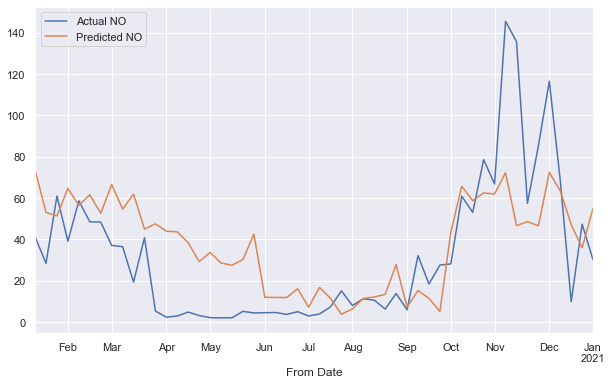

In [17]:
test['NO'].plot(legend=True, label='Actual NO', figsize=(10,6))
X['pred'].plot(legend=True, label='Predicted NO')

In [18]:
np.sqrt(mean_squared_error(test['NO'],X['pred']))

27.142201897539984

In [19]:
mae = metrics.mean_absolute_error(ytest, gboost_pred)
mse = metrics.mean_squared_error(ytest, gboost_pred)
rmsetest = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(ytest,gboost_pred)

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmsetest)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 23.331183297626623
MSE: 1005.9801499033441
RMSE: 31.717190132534505
R-Squared: 0.6472062398606497


In [20]:
mae = metrics.mean_absolute_error(test['NO'],X['pred'])
mse = metrics.mean_squared_error(test['NO'],X['pred'])
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(test['NO'],X['pred'])

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 20.290125411932195
MSE: 736.6991238468231
RMSE: 27.142201897539984
R-Squared: 0.36797719053216693


In [21]:
import pickle
filename = 'NO_gboostmodel.sav'
pickle.dump(grad_boost, open(filename, 'wb'))

In [22]:
#load model
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(xtest, ytest)
print(result)

0.6472062398606497


# 3rd plot

In [23]:
testcase = pd.DataFrame()

In [24]:
testcase['test']=ytest
testcase['pred']=gboost_pred

In [25]:
testcase["Corrected"] = np.where(testcase["pred"]<testcase["test"],testcase["pred"]+rmsetest ,
                   np.where(testcase["pred"]>testcase["test"], testcase["pred"]-rmsetest,
                            testcase["pred"]))

In [26]:
testcase

,test,pred,Corrected
83,25.287143,10.548402,42.265592
347,11.471429,13.015371,-18.701819
80,3.372857,8.653366,-23.063824
299,94.998571,37.235674,68.952865
308,150.995714,161.269195,129.552005
...,...,...,...
38,15.642857,-19.720671,11.996519
106,73.390000,130.270670,98.553479
272,38.617143,65.039265,33.322075
111,47.614286,68.091229,36.374039


In [27]:
'''testcase['test'].plot(legend=True, label='Actual PM2.5', figsize=(10,6))
testcase['pred'].plot(legend=True, label='Predicted PM2.5')
testcase["Corrected"].plot(legend=True, label='Corrected PM2.5')'''

'testcase[\'test\'].plot(legend=True, label=\'Actual PM2.5\', figsize=(10,6))\ntestcase[\'pred\'].plot(legend=True, label=\'Predicted PM2.5\')\ntestcase["Corrected"].plot(legend=True, label=\'Corrected PM2.5\')'

In [28]:
r2 = metrics.r2_score(testcase["Corrected"],testcase['test'])
r2

0.8452965637063852

In [29]:
test2020=pd.DataFrame()

In [30]:
test2020['test']=test['NO']
test2020['pred']=X['pred']

In [31]:
test2020.index=test.index

In [32]:
test2020["Corrected"] = np.where(test2020["pred"]<test2020["test"],test2020["pred"]+rmsetest ,
                   np.where(test2020["pred"]>test2020["test"], test2020["pred"]-rmsetest,
                            test2020["pred"]))

<AxesSubplot:xlabel='From Date'>

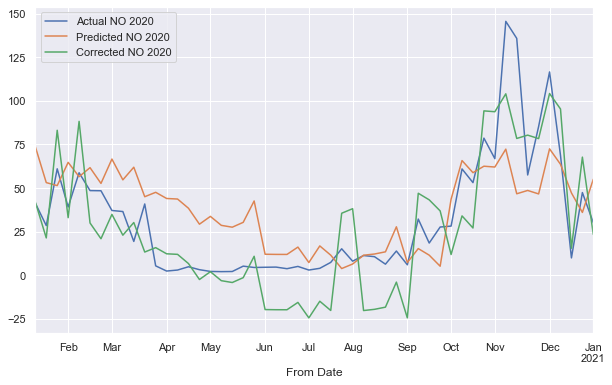

In [33]:
test2020['test'].plot(legend=True, label='Actual NO 2020', figsize=(10,6))
test2020['pred'].plot(legend=True, label='Predicted NO 2020')
test2020["Corrected"].plot(legend=True, label='Corrected NO 2020')

In [34]:
r2020 = metrics.r2_score(test2020["Corrected"],test2020['test'])
r2020

0.6825707102797286

In [35]:
test2020.loc["2020-05-18":"2020-05-31",'pred'].median()

36.4442976900908